In [1]:
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
import folium

import os

In [2]:
gdf = gpd.read_file("Data/LSOA_shapefiles/Lower_layer_Super_Output_Areas_(December_2021)_Boundaries_EW_BFC_(V10).shp")
gdf.rename(columns={'LSOA21CD': 'LSOA Code', 'LSOA21NM': 'LSOA Name'}, inplace=True)
gdf.set_index('LSOA Code', inplace=True)
gdf = gdf.to_crs("EPSG:4326")
gdf.head()


,FID,LSOA Name,LSOA21NMW,BNG_E,BNG_N,LAT,LONG,Shape__Are,Shape__Len,GlobalID,geometry
LSOA Code,,,,,,,,,,,
E01000001,1,City of London 001A,None,532123,181632,51.51817,-0.097150,129865.314476,2635.767993,c625aea8-6d73-4b2a-be76-4d5c44cad9f8,"POLYGON ((-0.09667 51.52027, -0.09666 51.52025..."
E01000002,2,City of London 001B,None,532480,181715,51.51883,-0.091970,228419.782242,2707.816821,52c878e9-ac68-4886-b4a8-fea9cd241a70,"POLYGON ((-0.08969 51.52069, -0.08973 51.52057..."
E01000003,3,City of London 001C,None,532239,182033,51.52174,-0.095330,59054.204697,1224.573160,b9d8faca-d489-478d-8ce6-acaf76186d7d,"POLYGON ((-0.09653 51.52295, -0.09647 51.52282..."
E01000005,4,City of London 001E,None,533581,181283,51.51469,-0.076280,189577.709503,2275.805344,15e1417d-537c-4845-9820-fc7596bd59b0,"POLYGON ((-0.07571 51.51575, -0.07542 51.51555..."
E01000006,5,Barking and Dagenham 016A,None,544994,184274,51.53875,0.089317,146536.995750,1966.092607,8a6c4ee0-c0ff-4736-9cfa-fb12a6d50da0,"POLYGON ((0.09122 51.53905, 0.09148 51.5389, 0..."


In [3]:
lad = pd.read_csv("Data/LSOA LAD Lookup.csv")
lad.rename(columns={'LSOA21CD':'LSOA Code', 'LSOA21NM':'a', 'LSOA21NMW':'b', 'LAD23CD':'c', 'LAD23NM':'LAD Name', 'LAD23NMW':'d', 'ObjectId':'e'}, inplace=True)
lad = lad.drop(columns=['a', 'b', 'c', 'd', 'e'])
lad.set_index('LSOA Code', inplace=True)
lad.head()

,LAD Name
LSOA Code,
E01011949,Hartlepool
E01011950,Hartlepool
E01011951,Hartlepool
E01011952,Hartlepool
E01011953,Hartlepool


In [4]:
gdf = gdf.merge(lad[['LAD Name']], left_index=True, right_index=True)
gdf = gdf.drop(columns=['FID', 'LSOA21NMW'])
gdf.head()
                

,LSOA Name,BNG_E,BNG_N,LAT,LONG,Shape__Are,Shape__Len,GlobalID,geometry,LAD Name
LSOA Code,,,,,,,,,,
E01000001,City of London 001A,532123,181632,51.51817,-0.097150,129865.314476,2635.767993,c625aea8-6d73-4b2a-be76-4d5c44cad9f8,"POLYGON ((-0.09667 51.52027, -0.09666 51.52025...",City of London
E01000002,City of London 001B,532480,181715,51.51883,-0.091970,228419.782242,2707.816821,52c878e9-ac68-4886-b4a8-fea9cd241a70,"POLYGON ((-0.08969 51.52069, -0.08973 51.52057...",City of London
E01000003,City of London 001C,532239,182033,51.52174,-0.095330,59054.204697,1224.573160,b9d8faca-d489-478d-8ce6-acaf76186d7d,"POLYGON ((-0.09653 51.52295, -0.09647 51.52282...",City of London
E01000005,City of London 001E,533581,181283,51.51469,-0.076280,189577.709503,2275.805344,15e1417d-537c-4845-9820-fc7596bd59b0,"POLYGON ((-0.07571 51.51575, -0.07542 51.51555...",City of London
E01000006,Barking and Dagenham 016A,544994,184274,51.53875,0.089317,146536.995750,1966.092607,8a6c4ee0-c0ff-4736-9cfa-fb12a6d50da0,"POLYGON ((0.09122 51.53905, 0.09148 51.5389, 0...",Barking and Dagenham


In [5]:
dep = pd.read_csv('Data/LSOA Deprivation.csv')
new_cols = dep.loc[5].values
dep.columns = new_cols
dep['LSOA Code'] = dep['2021 super output area - lower layer'].str.split(' : ').str[0]
dep['LSOA Name'] = dep['2021 super output area - lower layer'].str.split(' : ').str[1]
dep = dep.drop(columns=['2021 super output area - lower layer'])
dep.set_index('LSOA Code', inplace=True)
dep = dep.iloc[7:-7]
dep.columns = ['Total Households','%','Not-N','Not-%','1-N','1-%','2-N','2-%','3-N','3-%','4-N','4-%','LSOA Name']
dep.drop('%', axis=1, inplace=True)
dep = dep.apply(lambda x: pd.to_numeric(x, errors='coerce') if x.name != "LSOA Name" else x)
dep['Deprived %'] = 100 - dep['Not-%']


gdf = gdf.merge(dep[['Deprived %', 'Total Households']], left_index=True, right_index=True)
gdf.head()

,LSOA Name,BNG_E,BNG_N,LAT,LONG,Shape__Are,Shape__Len,GlobalID,geometry,LAD Name,Deprived %,Total Households
LSOA Code,,,,,,,,,,,,
E01000001,City of London 001A,532123,181632,51.51817,-0.097150,129865.314476,2635.767993,c625aea8-6d73-4b2a-be76-4d5c44cad9f8,"POLYGON ((-0.09667 51.52027, -0.09666 51.52025...",City of London,34.6,838
E01000002,City of London 001B,532480,181715,51.51883,-0.091970,228419.782242,2707.816821,52c878e9-ac68-4886-b4a8-fea9cd241a70,"POLYGON ((-0.08969 51.52069, -0.08973 51.52057...",City of London,34.2,824
E01000003,City of London 001C,532239,182033,51.52174,-0.095330,59054.204697,1224.573160,b9d8faca-d489-478d-8ce6-acaf76186d7d,"POLYGON ((-0.09653 51.52295, -0.09647 51.52282...",City of London,52.0,1014
E01000005,City of London 001E,533581,181283,51.51469,-0.076280,189577.709503,2275.805344,15e1417d-537c-4845-9820-fc7596bd59b0,"POLYGON ((-0.07571 51.51575, -0.07542 51.51555...",City of London,66.0,479
E01000006,Barking and Dagenham 016A,544994,184274,51.53875,0.089317,146536.995750,1966.092607,8a6c4ee0-c0ff-4736-9cfa-fb12a6d50da0,"POLYGON ((0.09122 51.53905, 0.09148 51.5389, 0...",Barking and Dagenham,63.2,554


In [6]:
def LAD_Deprivation_Plotter(gdf, LAD_Name=str):
    lsoas_in_lad = gdf[gdf['LAD Name'] == LAD_Name]

    columns_displayed = ['LSOA Name', 'Deprived %']

    m = lsoas_in_lad.explore(column='Deprived %', cmap='RdYlGn_r', legend=True, tooltip=columns_displayed)
    folium.LayerControl().add_to(m)
    return m

# LAD_Deprivation_Plotter(gdf, 'Kensington and Chelsea')

In [7]:
def LAD_Deprivation_Plotter_Static(gdf, LAD_Name):
    lsoas_in_lad = gdf[gdf['LAD Name'] == LAD_Name]
    fig, ax = plt.subplots(figsize=(10, 8))
    lsoas_in_lad.plot(column='Deprived %', cmap='RdYlGn_r', legend=True, 
                      legend_kwds={'label': "Deprivation (%)", 'shrink': 0.5}, ax=ax)
    ax.set_title(f"Deprivation in {LAD_Name}", fontsize=14)
    ax.axis("off")
    plt.savefig(f"{LAD_Name.replace(' ', '_')}_deprivation_plot.png", dpi=300, bbox_inches="tight")
    plt.show()

#LAD_Deprivation_Plotter_Static(gdf, 'Kensington and Chelsea')

In [8]:
eth = pd.read_csv('Data/LSOA Ethnicity.csv')
eth.columns = ['LSOA', 'Total', '%', 'Asian', 'Asian %', 'Black', 'Black %', 'Mixed', 'Mixed %', 'White',
               'White %', 'Other', 'Other %']
eth = eth.apply(lambda x: pd.to_numeric(x, errors='coerce') if x.name != "LSOA" else x)
eth = eth.iloc[7:-7]
eth['LSOA Code'] = eth['LSOA'].str.split(' : ').str[0]
eth['LSOA Name'] = eth['LSOA'].str.split(' : ').str[1]
eth.drop('%', axis=1, inplace=True)
eth.drop('LSOA', axis=1, inplace=True)
eth.set_index('LSOA Code', inplace=True)
eth['Non-White'] = eth['Total'] - eth['White']
eth['Non-White %'] = 100 - eth['White %']
eth.head()

,Total,Asian,Asian %,Black,Black %,Mixed,Mixed %,White,White %,Other,Other %,LSOA Name,Non-White,Non-White %
LSOA Code,,,,,,,,,,,,,,
E01011954,2284.0,19.0,0.8,0.0,0.0,6.0,0.3,2248.0,98.4,11.0,0.5,Hartlepool 001A,36.0,1.6
E01011969,1345.0,6.0,0.4,0.0,0.0,6.0,0.4,1329.0,98.8,4.0,0.3,Hartlepool 001B,16.0,1.2
E01011970,1070.0,7.0,0.7,0.0,0.0,4.0,0.4,1059.0,99.0,0.0,0.0,Hartlepool 001C,11.0,1.0
E01011971,1323.0,5.0,0.4,0.0,0.0,5.0,0.4,1311.0,99.1,2.0,0.2,Hartlepool 001D,12.0,0.9
E01033465,1954.0,12.0,0.6,2.0,0.1,11.0,0.6,1914.0,98.0,15.0,0.8,Hartlepool 001F,40.0,2.0


In [9]:
gdf = gdf.merge(eth[['Total', 'Asian %', 'Black %', 'Mixed %', 'White %', 'Other %', 'Non-White %']], right_index=True, left_index=True)
gdf.head()

,LSOA Name,BNG_E,BNG_N,LAT,LONG,Shape__Are,Shape__Len,GlobalID,geometry,LAD Name,Deprived %,Total Households,Total,Asian %,Black %,Mixed %,White %,Other %,Non-White %
LSOA Code,,,,,,,,,,,,,,,,,,,
E01000001,City of London 001A,532123,181632,51.51817,-0.097150,129865.314476,2635.767993,c625aea8-6d73-4b2a-be76-4d5c44cad9f8,"POLYGON ((-0.09667 51.52027, -0.09666 51.52025...",City of London,34.6,838,1474.0,10.7,0.7,3.8,80.1,4.6,19.9
E01000002,City of London 001B,532480,181715,51.51883,-0.091970,228419.782242,2707.816821,52c878e9-ac68-4886-b4a8-fea9cd241a70,"POLYGON ((-0.08969 51.52069, -0.08973 51.52057...",City of London,34.2,824,1386.0,13.1,0.8,4.3,78.2,3.6,21.8
E01000003,City of London 001C,532239,182033,51.52174,-0.095330,59054.204697,1224.573160,b9d8faca-d489-478d-8ce6-acaf76186d7d,"POLYGON ((-0.09653 51.52295, -0.09647 51.52282...",City of London,52.0,1014,1612.0,9.5,3.5,6.3,74.1,6.6,25.9
E01000005,City of London 001E,533581,181283,51.51469,-0.076280,189577.709503,2275.805344,15e1417d-537c-4845-9820-fc7596bd59b0,"POLYGON ((-0.07571 51.51575, -0.07542 51.51555...",City of London,66.0,479,1101.0,32.2,10.8,7.2,38.5,11.4,61.5
E01000006,Barking and Dagenham 016A,544994,184274,51.53875,0.089317,146536.995750,1966.092607,8a6c4ee0-c0ff-4736-9cfa-fb12a6d50da0,"POLYGON ((0.09122 51.53905, 0.09148 51.5389, 0...",Barking and Dagenham,63.2,554,1845.0,48.0,10.8,3.8,32.8,4.6,67.2


In [10]:
rur_urb = pd.read_csv('Data/LSOA Rural-Urban Classification 2011.csv')
rur_urb.drop('FID', axis=1, inplace=True)
rur_urb.drop('RUC11CD', axis=1, inplace=True)
rur_urb.columns = ['LSOA Code', 'LSOA Name', 'Classification']
rur_urb.set_index('LSOA Code', inplace=True)

In [11]:
gdf = gdf.merge(rur_urb[['Classification']], how='left', left_index=True, right_index=True)

lsoas_with_nan = gdf[gdf['Classification'].isna()]
modal_classification = gdf.groupby(gdf['LSOA Name'].str.split().str[0])['Classification'].agg(lambda x: x.mode().iloc[0])
gdf.loc[gdf['Classification'].isna(), 'Classification'] = gdf.loc[gdf['Classification'].isna(), 'LSOA Name'].str.split().str[0].map(modal_classification)
gdf['Rural or Urban'] = gdf['Classification'].str.split().str[0]

column_order = ['LSOA Name', 'LAD Name', 'Deprived %', 'Total', 'Asian %', 'Black %', 'Mixed %', 'White %', 'Other %', 'Non-White %', 'Classification', 'Rural or Urban',
                'BNG_E', 'BNG_N', 'LONG', 'LAT','Shape__Are', 'Shape__Len', 'GlobalID', 'geometry']
gdf = gdf[column_order]

gdf.head()

,LSOA Name,LAD Name,Deprived %,Total,Asian %,Black %,Mixed %,White %,Other %,Non-White %,Classification,Rural or Urban,BNG_E,BNG_N,LONG,LAT,Shape__Are,Shape__Len,GlobalID,geometry
LSOA Code,,,,,,,,,,,,,,,,,,,,
E01000001,City of London 001A,City of London,34.6,1474.0,10.7,0.7,3.8,80.1,4.6,19.9,Urban major conurbation,Urban,532123,181632,-0.097150,51.51817,129865.314476,2635.767993,c625aea8-6d73-4b2a-be76-4d5c44cad9f8,"POLYGON ((-0.09667 51.52027, -0.09666 51.52025..."
E01000002,City of London 001B,City of London,34.2,1386.0,13.1,0.8,4.3,78.2,3.6,21.8,Urban major conurbation,Urban,532480,181715,-0.091970,51.51883,228419.782242,2707.816821,52c878e9-ac68-4886-b4a8-fea9cd241a70,"POLYGON ((-0.08969 51.52069, -0.08973 51.52057..."
E01000003,City of London 001C,City of London,52.0,1612.0,9.5,3.5,6.3,74.1,6.6,25.9,Urban major conurbation,Urban,532239,182033,-0.095330,51.52174,59054.204697,1224.573160,b9d8faca-d489-478d-8ce6-acaf76186d7d,"POLYGON ((-0.09653 51.52295, -0.09647 51.52282..."
E01000005,City of London 001E,City of London,66.0,1101.0,32.2,10.8,7.2,38.5,11.4,61.5,Urban major conurbation,Urban,533581,181283,-0.076280,51.51469,189577.709503,2275.805344,15e1417d-537c-4845-9820-fc7596bd59b0,"POLYGON ((-0.07571 51.51575, -0.07542 51.51555..."
E01000006,Barking and Dagenham 016A,Barking and Dagenham,63.2,1845.0,48.0,10.8,3.8,32.8,4.6,67.2,Urban major conurbation,Urban,544994,184274,0.089317,51.53875,146536.995750,1966.092607,8a6c4ee0-c0ff-4736-9cfa-fb12a6d50da0,"POLYGON ((0.09122 51.53905, 0.09148 51.5389, 0..."


In [12]:
def LAD_Ethnicity_Plotter(gdf, LAD_Name=str, ethnicity=str):
    lsoas_in_lad = gdf[gdf['LAD Name'] == LAD_Name]

    columns_displayed = ['LSOA Name', 'White %', 'Asian %', 'Black %', 'Mixed %', 'Other %', 'Non-White %']

    m = lsoas_in_lad.explore(column=f"{ethnicity} %", cmap='RdYlGn_r', legend=True, tooltip=columns_displayed)
    folium.LayerControl().add_to(m)
    return m

# LAD_Ethnicity_Plotter(gdf, 'City of London', 'White')

In [13]:
def LAD_Rurality_Plotter(gdf, LAD_Name):
   lad_data = gdf[gdf['LAD Name'] == LAD_Name].copy()
   
   m = lad_data.explore(
       column='Classification',
       cmap='Spectral',
       legend=True,
       legend_kwds={
           'caption': 'Rural-Urban Classification',
           'bbox_to_anchor': (1.1, 1)
       }
   )
   
   return m

#LAD_Rurality_Plotter(gdf, 'Gwynedd')

In [14]:
lad_gdf = gpd.read_file("Data/LAD_shapefiles/LAD_MAY_2023_EW_BUC_BESPOKE.shp")
lad_gdf.head()

,LAD23CD,LAD23NM,LAD23NMW,BNG_E,BNG_N,LONG,LAT,GlobalID,geometry
0,E06000001,Hartlepool,None,447160,531474,-1.27018,54.6761,30c07a92-d72e-4cb0-8670-82730983c395,"POLYGON ((448973.593 536745.277, 448986.025 53..."
1,E06000002,Middlesbrough,None,451141,516887,-1.21099,54.5447,e89cee90-7dfc-4bef-a375-ad715f00d455,"POLYGON ((451894.299 521145.303, 453997.697 51..."
2,E06000003,Redcar and Cleveland,None,464361,519597,-1.00608,54.5675,a1ddad96-e6a8-4b04-9cab-098c8e1df209,"POLYGON ((478232.568 518788.831, 477689.303 51..."
3,E06000004,Stockton-on-Tees,None,444940,518183,-1.30664,54.5569,a63605d7-85b6-4c25-a0b1-97d68bfaae03,"POLYGON ((452243.536 526335.188, 451711.3 5256..."
4,E06000005,Darlington,None,428029,515648,-1.56835,54.5353,acafd58b-c2d1-4149-81fe-805f6e8bb733,"POLYGON ((436388.002 522354.197, 437351.702 52..."


In [15]:
def LAD_Blank_Plotter(gdf):
    m = gdf.explore(
        cmap='Greys',
        legend=False
    )
    return m

#LAD_Blank_Plotter(lad_gdf)


In [16]:
gdf.head()

,LSOA Name,LAD Name,Deprived %,Total,Asian %,Black %,Mixed %,White %,Other %,Non-White %,Classification,Rural or Urban,BNG_E,BNG_N,LONG,LAT,Shape__Are,Shape__Len,GlobalID,geometry
LSOA Code,,,,,,,,,,,,,,,,,,,,
E01000001,City of London 001A,City of London,34.6,1474.0,10.7,0.7,3.8,80.1,4.6,19.9,Urban major conurbation,Urban,532123,181632,-0.097150,51.51817,129865.314476,2635.767993,c625aea8-6d73-4b2a-be76-4d5c44cad9f8,"POLYGON ((-0.09667 51.52027, -0.09666 51.52025..."
E01000002,City of London 001B,City of London,34.2,1386.0,13.1,0.8,4.3,78.2,3.6,21.8,Urban major conurbation,Urban,532480,181715,-0.091970,51.51883,228419.782242,2707.816821,52c878e9-ac68-4886-b4a8-fea9cd241a70,"POLYGON ((-0.08969 51.52069, -0.08973 51.52057..."
E01000003,City of London 001C,City of London,52.0,1612.0,9.5,3.5,6.3,74.1,6.6,25.9,Urban major conurbation,Urban,532239,182033,-0.095330,51.52174,59054.204697,1224.573160,b9d8faca-d489-478d-8ce6-acaf76186d7d,"POLYGON ((-0.09653 51.52295, -0.09647 51.52282..."
E01000005,City of London 001E,City of London,66.0,1101.0,32.2,10.8,7.2,38.5,11.4,61.5,Urban major conurbation,Urban,533581,181283,-0.076280,51.51469,189577.709503,2275.805344,15e1417d-537c-4845-9820-fc7596bd59b0,"POLYGON ((-0.07571 51.51575, -0.07542 51.51555..."
E01000006,Barking and Dagenham 016A,Barking and Dagenham,63.2,1845.0,48.0,10.8,3.8,32.8,4.6,67.2,Urban major conurbation,Urban,544994,184274,0.089317,51.53875,146536.995750,1966.092607,8a6c4ee0-c0ff-4736-9cfa-fb12a6d50da0,"POLYGON ((0.09122 51.53905, 0.09148 51.5389, 0..."


In [17]:
from sklearn.cluster import KMeans

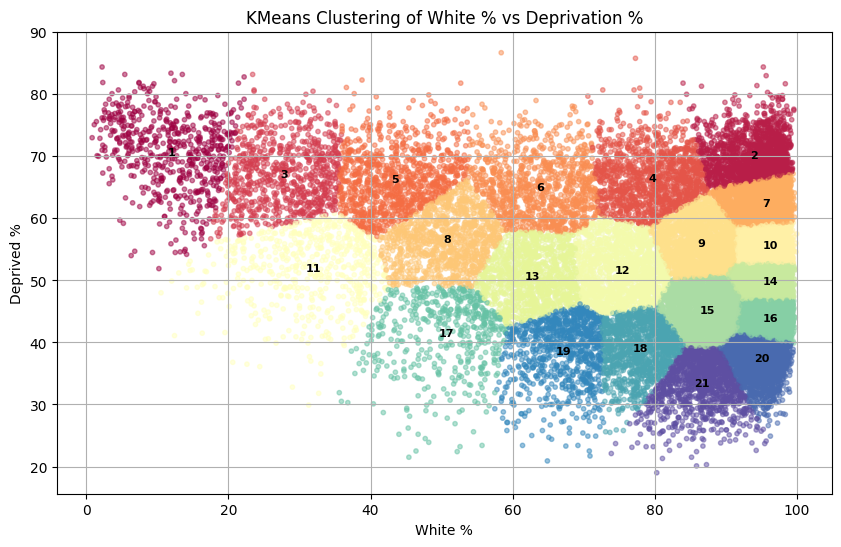

In [18]:
kmeans = KMeans(n_clusters=21, random_state=0)
gdf['KMeans Cluster'] = kmeans.fit_predict(gdf[['White %', 'Deprived %']])

cluster_means = gdf.groupby('KMeans Cluster')[['White %', 'Deprived %']].mean()
sorted_clusters = cluster_means.sort_values(by='Deprived %', ascending=False).index
cluster_mapping = {old_label: new_label for new_label, old_label in enumerate(sorted_clusters, start=1)}
gdf['Cluster'] = gdf['KMeans Cluster'].map(cluster_mapping)

plt.figure(figsize=(10, 6))
plt.scatter(gdf['White %'], gdf['Deprived %'], c=gdf['Cluster'], cmap='Spectral', s=10, alpha=0.5)
plt.title('KMeans Clustering of White % vs Deprivation %')
plt.xlabel('White %')
plt.ylabel('Deprived %')
plt.grid(True)

for cluster, (x, y) in cluster_means.iterrows():
    sorted_cluster = cluster_mapping[cluster]
    plt.text(x, y, str(sorted_cluster), fontsize=8, ha='center', va='center', color='black', fontweight='bold')

plt.show()

gdf.drop(columns=['KMeans Cluster'], inplace=True)

In [22]:
df = gdf.copy()

grouped = df.groupby('Cluster').agg(
    LSOA_Counts=('Cluster', 'size'),
    Total_Population=('Total', 'sum'),
    White_Residents=('White %', lambda x: (x / 100 * df.loc[x.index, 'Total']).sum()),
    Black_Residents=('Black %', lambda x: (x / 100 * df.loc[x.index, 'Total']).sum()),
    Asian_Residents=('Asian %', lambda x: (x / 100 * df.loc[x.index, 'Total']).sum()),
    Mixed_Residents=('Mixed %', lambda x: (x / 100 * df.loc[x.index, 'Total']).sum()),
    Other_Residents=('Other %', lambda x: (x / 100 * df.loc[x.index, 'Total']).sum()),
    Deprived_Proportion=('Deprived %', lambda x: (x / 100 * df.loc[x.index, 'Total']).sum() / df.loc[x.index, 'Total'].sum())
)

overall_population = grouped['Total_Population'].sum()

grouped['Population_Proportion'] = grouped['Total_Population'] / overall_population
grouped['White_Proportion'] = grouped['White_Residents'] / grouped['Total_Population']
grouped['Black_Proportion'] = grouped['Black_Residents'] / grouped['Total_Population']
grouped['Asian_Proportion'] = grouped['Asian_Residents'] / grouped['Total_Population']
grouped['Mixed_Proportion'] = grouped['Mixed_Residents'] / grouped['Total_Population']
grouped['Other_Proportion'] = grouped['Other_Residents'] / grouped['Total_Population']

cluster_summary = grouped[[
    'LSOA_Counts', 'Total_Population', 'Population_Proportion',
    'White_Proportion', 'Black_Proportion', 'Asian_Proportion',
    'Mixed_Proportion', 'Other_Proportion', 'Deprived_Proportion'
]]

cluster_summary

,LSOA_Counts,Total_Population,Population_Proportion,White_Proportion,Black_Proportion,Asian_Proportion,Mixed_Proportion,Other_Proportion,Deprived_Proportion
Cluster,,,,,,,,,
1,576,1134640.0,0.019038,0.118942,0.106607,0.685240,0.027124,0.062080,0.707203
2,1627,2502592.0,0.041992,0.939115,0.013560,0.019892,0.019172,0.008279,0.700689
3,749,1444524.0,0.024238,0.277966,0.180896,0.421231,0.046579,0.073366,0.670688
4,1210,2027968.0,0.034028,0.795352,0.062340,0.076669,0.041700,0.023944,0.663606
5,939,1719220.0,0.028847,0.433768,0.189667,0.244505,0.057063,0.074988,0.661906
6,975,1745058.0,0.029281,0.637491,0.104748,0.165941,0.049970,0.041850,0.649885
7,2730,4255677.0,0.071407,0.956104,0.007361,0.015884,0.014975,0.005694,0.623876
8,1015,1876515.0,0.031486,0.506978,0.146151,0.224031,0.059002,0.063871,0.565104
9,1786,2933471.0,0.049221,0.864924,0.028663,0.058816,0.031722,0.015878,0.559580


In [ ]:
selected_clusters = [1, 2, 3, 4, 5, 6, 7]

cmap = LinearSegmentedColormap.from_list("custom_gradient", ['#FFFF00', '#FF4500', '#800080', '#0000FF'], N=len(selected_clusters))
colors = [cmap(i / (len(selected_clusters) - 1)) for i in range(len(selected_clusters))]
color_map = {cluster: color for cluster, color in zip(selected_clusters, colors)}
default_color = '#D3D3D3'

gdf_cluster['Color'] = gdf_cluster['Cluster'].apply(lambda x: color_map[x] if x in selected_clusters else default_color)

fig, ax = plt.subplots(figsize=(10, 8))
gdf_cluster.plot(color=gdf_cluster['Color'], ax=ax, legend=False)
handles = [
    Line2D([0], [0], marker='o', color='w', markerfacecolor=color_map[c], markersize=8)
    for c in selected_clusters
]
ax.legend(handles, [f'Cluster {c}' for c in selected_clusters], title="Cluster", loc='upper left', fontsize=8, title_fontsize=10)
ax.set(title='Geographical Distribution of Selected Clusters', xlabel='Longitude', ylabel='Latitude')
plt.tight_layout()
plt.show()